In [5]:
# source: https://www.kaggle.com/datasets/martinellis/synthetic-lego-images/

import cv2
import torch
import logging
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from lib.lego_dataset import LegoDataset, LegoWithMasksDataset

DATA_ROOT = Path('./datasets/synthetic-lego-images/versions/4/')

device = torch.device('cuda')
# logging.getLogger('lib.lego_dataset').setLevel(logging.ERROR)

In [6]:
train_dataset = LegoDataset(DATA_ROOT, 'train')
valid_dataset = LegoDataset(DATA_ROOT, 'valid')

len(train_dataset), len(valid_dataset)

/home/kol/kol/redbull/.venv/lib/python3.13/site-packages/albumentations/core/composition.py:331: UserWarning: Got processor for bboxes, but no transform to process it.
  self._set_keys()


(8000, 2000)

In [7]:
valid_dataset.annotations

,img_id,width,height,x,y,w,h,labels
79,images/rgb_161.png,512,512,312,38,9,7,2
80,images/rgb_161.png,512,512,299,29,26,23,47
81,images/rgb_161.png,512,512,349,51,22,16,58
82,images/rgb_161.png,512,512,222,74,28,10,37
83,images/rgb_161.png,512,512,253,19,115,71,7
...,...,...,...,...,...,...,...,...
1045816,images/rgb_799601.png,512,512,132,226,3,4,36
1045817,images/rgb_799601.png,512,512,186,206,10,12,14
1045818,images/rgb_799601.png,512,512,299,177,26,40,3
1045819,images/rgb_799601.png,512,512,221,207,5,6,33


torch.Size([3, 512, 512])


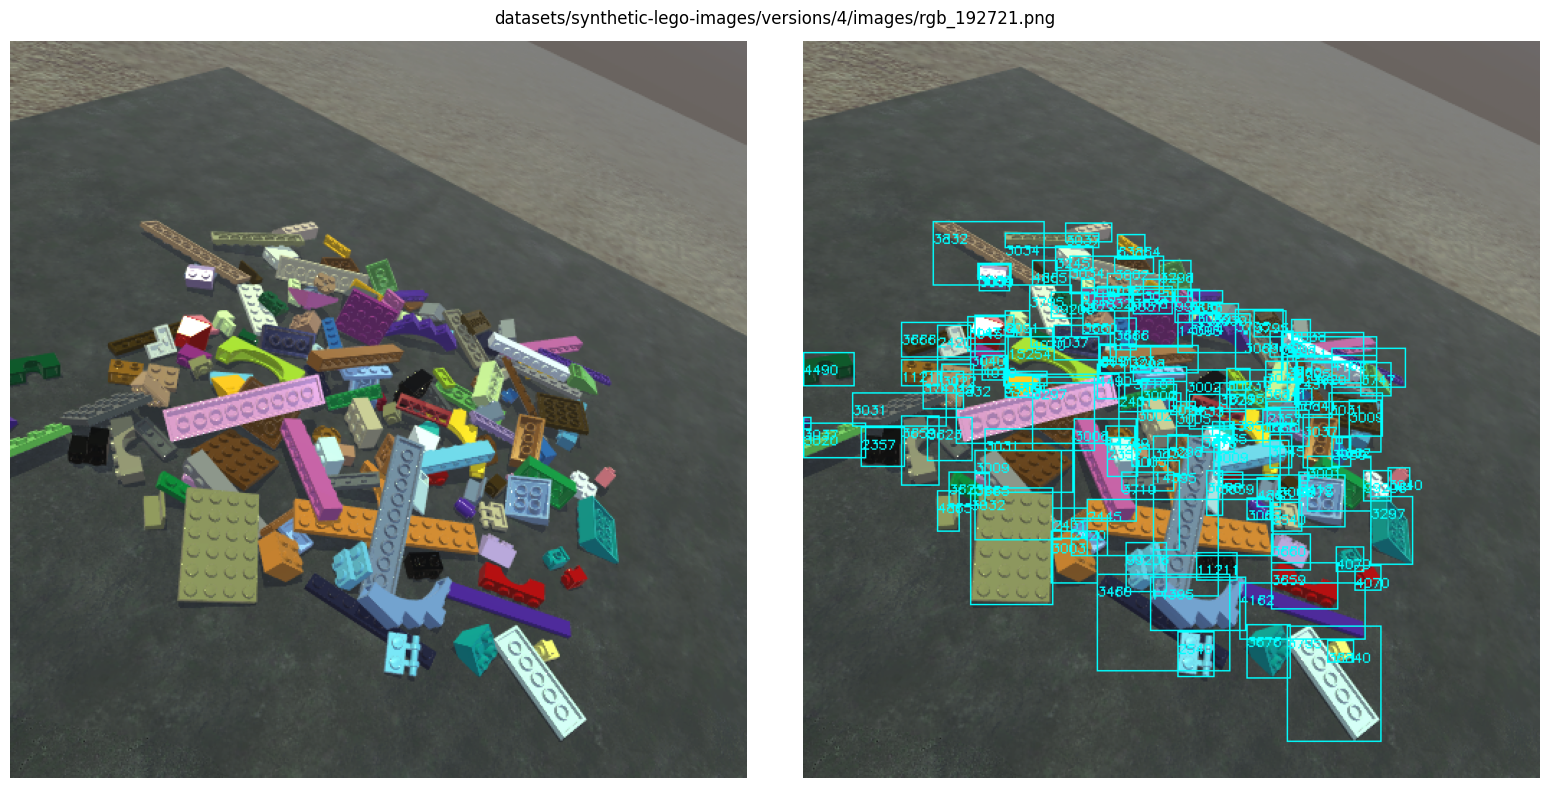

In [8]:
index = np.random.randint(len(valid_dataset))
image, target = valid_dataset.get_with_target(index)
print(image.shape)

fig, axs = plt.subplots(1,2, figsize=(16,8))
fig.suptitle(target["image_fn"])
axs[0].imshow(image.permute(1,2,0).cpu().numpy())
axs[0].axis('off')

sample = image.permute(1,2,0).cpu().numpy()
for i, box in enumerate(target['boxes']):
    cv2.rectangle(
        sample,
        (int(box[0]), int(box[1])),
        (int(box[2]), int(box[3])),
        (0, 1, 1), 1)
    cv2.putText(sample, 
        valid_dataset.classes[int(target['labels'][i])], 
        (int(box[0]), int(box[1])+15),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.3, 
        (0, 1, 1), 
        1, 
        cv2.LINE_AA)

axs[1].imshow(sample)
axs[1].axis('off')
_ = fig.tight_layout()

In [9]:
train_dataset = LegoWithMasksDataset(DATA_ROOT, 'train')
valid_dataset = LegoWithMasksDataset(DATA_ROOT, 'valid')

len(train_dataset), len(valid_dataset)

(8000, 2000)

In [10]:
valid_dataset.annotations

,img_id,width,height,labels
7889,images/rgb_66801.png,512,512,"{2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17..."
6845,images/rgb_59281.png,512,512,"{2, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17,..."
4269,images/rgb_407361.png,512,512,"{0, 1, 3, 4, 5, 6, 7, 8, 13, 14, 15, 16, 18, 1..."
4350,images/rgb_413201.png,512,512,"{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15..."
2836,images/rgb_304161.png,512,512,"{1, 3, 6, 10, 11, 12, 13, 14, 15, 16, 17, 18, ..."
...,...,...,...,...
1165,images/rgb_183921.png,512,512,"{0, 1, 2, 4, 5, 6, 7, 8, 10, 11, 16, 17, 18, 1..."
4479,images/rgb_422481.png,512,512,"{0, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1..."
7624,images/rgb_648881.png,512,512,"{2, 3, 5, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18..."
4041,images/rgb_391041.png,512,512,"{0, 1, 2, 3, 4, 5, 6, 7, 8, 12, 14, 15, 17, 18..."


Cannot find segmentation mask for label 5 on datasets/synthetic-lego-images/versions/4/semantic-segmentation/segmentation_714961.png
Cannot find segmentation mask for label 8 on datasets/synthetic-lego-images/versions/4/semantic-segmentation/segmentation_714961.png
Cannot find segmentation mask for label 19 on datasets/synthetic-lego-images/versions/4/semantic-segmentation/segmentation_714961.png
Cannot find segmentation mask for label 23 on datasets/synthetic-lego-images/versions/4/semantic-segmentation/segmentation_714961.png
Cannot find segmentation mask for label 31 on datasets/synthetic-lego-images/versions/4/semantic-segmentation/segmentation_714961.png
Cannot find segmentation mask for label 33 on datasets/synthetic-lego-images/versions/4/semantic-segmentation/segmentation_714961.png
Cannot find segmentation mask for label 50 on datasets/synthetic-lego-images/versions/4/semantic-segmentation/segmentation_714961.png


torch.Size([3, 512, 512]) torch.Size([74, 512, 512])


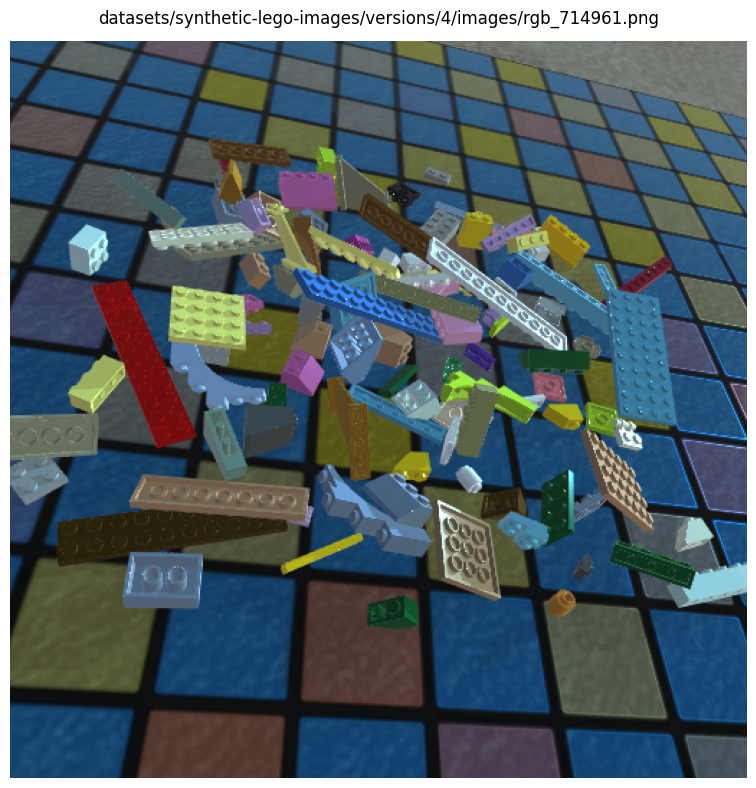

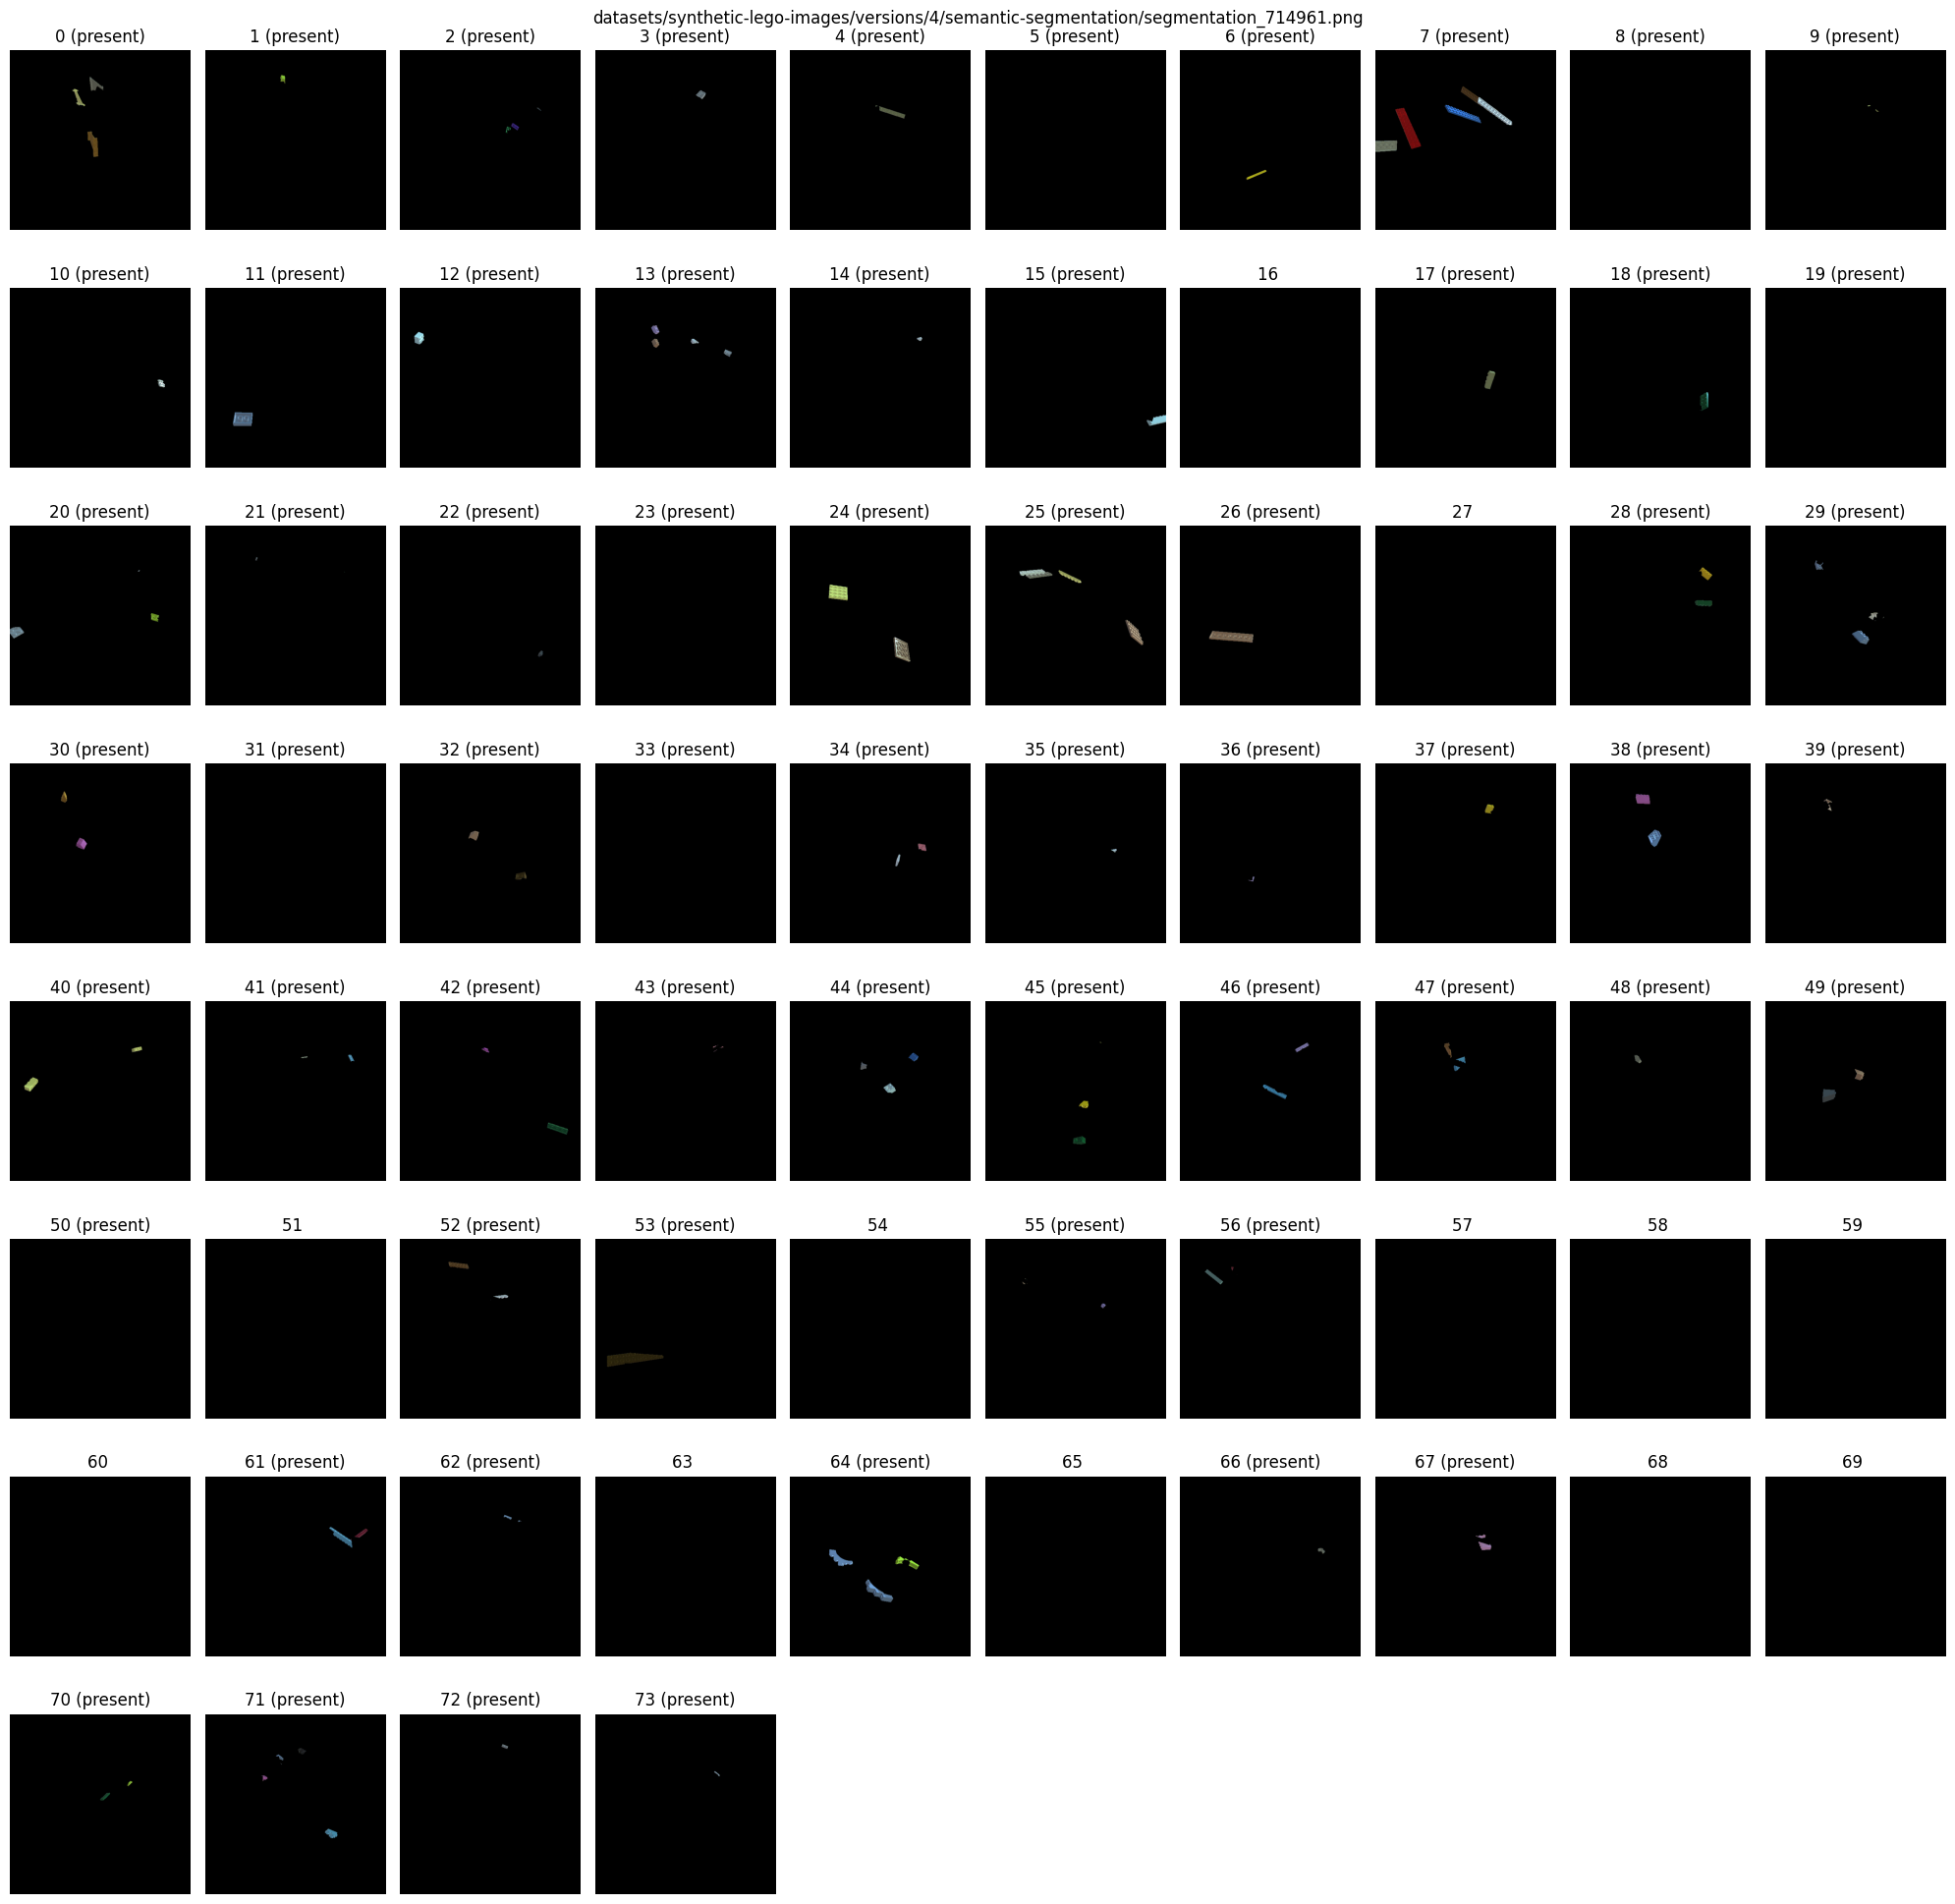

In [12]:
index = np.random.randint(len(valid_dataset))
image, masks, target = valid_dataset.get_with_target(index)
print(image.shape, masks.shape)

fig = plt.figure(figsize=(8,8))
fig.suptitle(target["image_fn"])
plt.imshow(image.permute(1,2,0).cpu().numpy())
plt.axis('off')
fig.tight_layout()

fig = plt.figure(figsize=(20,20))
fig.suptitle(f"{target["mask_fn"]}")
for i, mask in enumerate(masks):
    # y = mask.cpu().numpy()
    y = image.permute(1,2,0).cpu().numpy().copy()
    y[ mask.numpy() == 0] = 0

    ax = plt.subplot(8, 10, i+1)
    ax.axis('off')
    ax.set_title(f'{i} {"(present)" if i in target["labels"] else ""}')
    ax.imshow(y)

_ = fig.tight_layout()
